<a href="https://colab.research.google.com/github/lisbethwaagstein/AI4PH/blob/main/Course_2_small_network_of_the_M2_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Collect data from website

https://sesstim.univ-amu.fr/en/node/16950


Let's do it by hand (you can try to automatize it for fun)

- PHS-PRIM : J.C. Dufour, R. Giorgi, M. Pinard, R. Lutaud, J. Mancini, C. Siani
- INF-PROF : O. Laverny
- INF-GRAM : O. Laverny
- CHA-AIPH : P. Avillach, J.C. Dufour, R. Giorgi
- MET-MALE : R. Giorgi, Q. Marcou, O. Laverny
- DAT-ORES : C. Beroud, F. de Lamotte, A.C. Lambotte
- PHS-PHRM : E. Le Barbenchon, R. Lutaud
- PHS-SNET : J.C. Dufour, V. Chomel
- MET-NLPF : J.C. DUFOUR, J. Grosjean, A. Neveol, B. Rance, P. Zweigenbaum

In a useful format (JSON)

In [2]:
data = {
    'PHS-PRIM' : ["Dufour","Giorgi","Pinard","Lutaud","Mancini","Siani"],
    'INF-PROF' : ["Laverny"],
    'INF-GRAM' : ["Laverny"],
    'CHA-AIPH' : ["Avillach", "Dufour", "Giorgi"],
    'MET-MALE' : ["Giorgi","Marcou","Laverny"],
    'DAT-ORES' : ["Beroud", "Lamotte", "Lambotte"],
    'PHS-PHRM' : ["Le Barbenchon", "Lutaud"],
    'PHS-SNET' : ["Dufour","Chomel"],
    'MET-NLPF' : ["Dufour","Grosjean","Neveol","Rance","Zweigenbaum"]
}

# save it
import json
json.dump(data,open("data.json","w"))

## Build networks

We are going to use Networkx library : https://networkx.org/

Differents networks are possible :

- individuals - individuals
- individuals - course

First an empty network

In [3]:
import networkx as nx
import pandas as pd

In [4]:
network = nx.Graph()

Add a node :

In [5]:
network.add_node("PHS-PRIM",cat="course",weight=1)

In [6]:
print(network)

Graph with 1 nodes and 0 edges


In [7]:
network.add_edge("PHS-PRIM","Dufour")

In [8]:
print(network)

Graph with 2 nodes and 1 edges


Get an element

In [9]:
network.nodes

NodeView(('PHS-PRIM', 'Dufour'))

Save the network

In [10]:
nx.write_graphml(network,"networkM2.graphml")

## Visualise network

With networkx : https://networkx.org/documentation/stable/reference/drawing.html

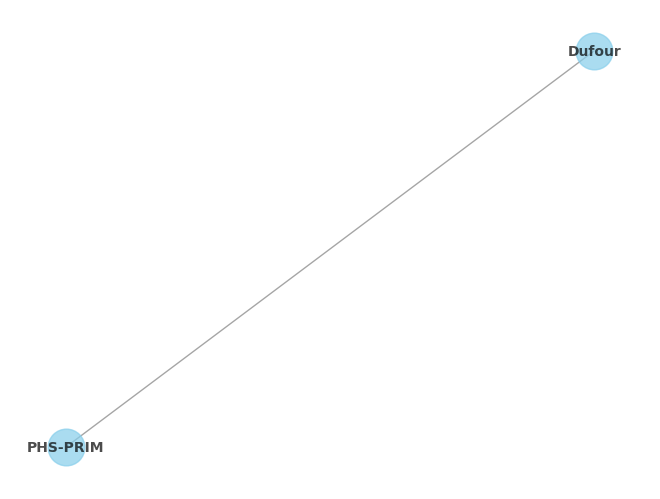

In [11]:
nx.draw(network, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue',
        font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)

Possibility of a dynamic visualization with ipysigma : https://github.com/medialab/ipysigma

In [13]:
pip install ipysigma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.6 MB/s eta 0:00:00


In [14]:
from ipysigma import Sigma

In [22]:
from google.colab import output
output.enable_custom_widget_manager()

In [24]:
Sigma(network)

Sigma(nx.Graph with 27 nodes and 26 edges)

Support for third party widgets will remain active for the duration of the session. To disable support:

## Exercice 1 : Build the complete network

Question 1:
- from the data, build the complete network individual / course
    - weight of individuals is the number of course they give
- make a visualisation

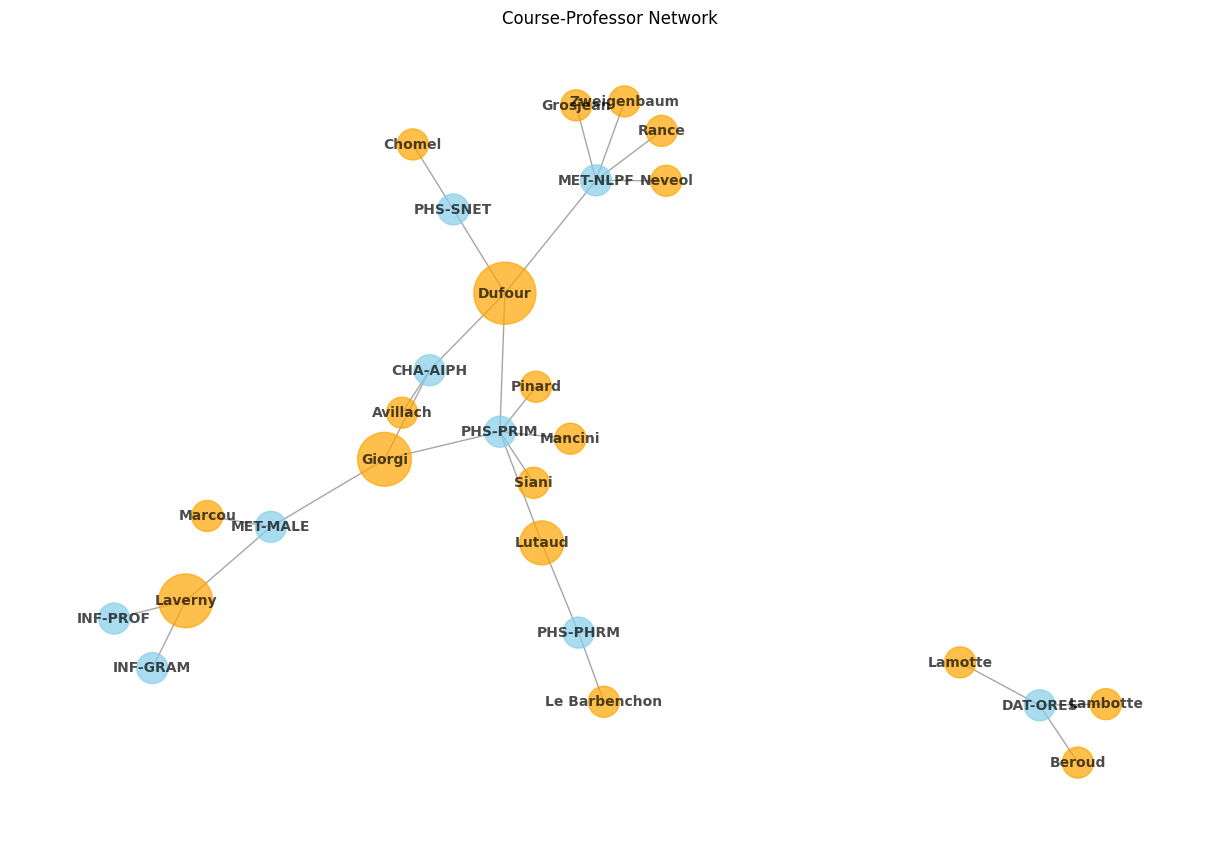

Sigma(nx.Graph with 27 nodes and 26 edges)

In [18]:
import matplotlib.pyplot as plt
# Add nodes and edges by looping through course and professor names
for course, professors in data.items():
    network.add_node(course, cat="course", weight=1)
    for prof in professors:
        network.add_node(prof, cat="individual", weight=0)
        network.add_edge(course, prof)  # link course and professors

# Assign the weights of individuals based on how many courses they dteach
for prof in network.nodes:
    if network.nodes[prof]['cat'] == "individual":
        network.nodes[prof]['weight'] = sum(1 for edge in network.edges(prof))

# Save network
nx.write_graphml(network, "networkM2.graphml")

# Visualize the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(network, seed=42)  # Generate a layout
node_sizes = [500 * network.nodes[node]['weight'] for node in network.nodes]
node_colors = ['skyblue' if network.nodes[node]['cat'] == "course" else 'orange' for node in network.nodes]

nx.draw(
    network,
    pos,
    with_labels=True,
    font_weight='bold',
    node_size=node_sizes,
    node_color=node_colors,
    font_color='black',
    font_size=10,
    edge_color='gray',
    linewidths=1,
    alpha=0.7
)

plt.title("AI4PH course-professor network")
plt.show()

# Visualization with ipysigma
Sigma(network)

Question 2:
Build the network unimodal with only individuals, they are linked if they are giving classes in the same teaching unit. Use itertools for iterating on tuple from a list

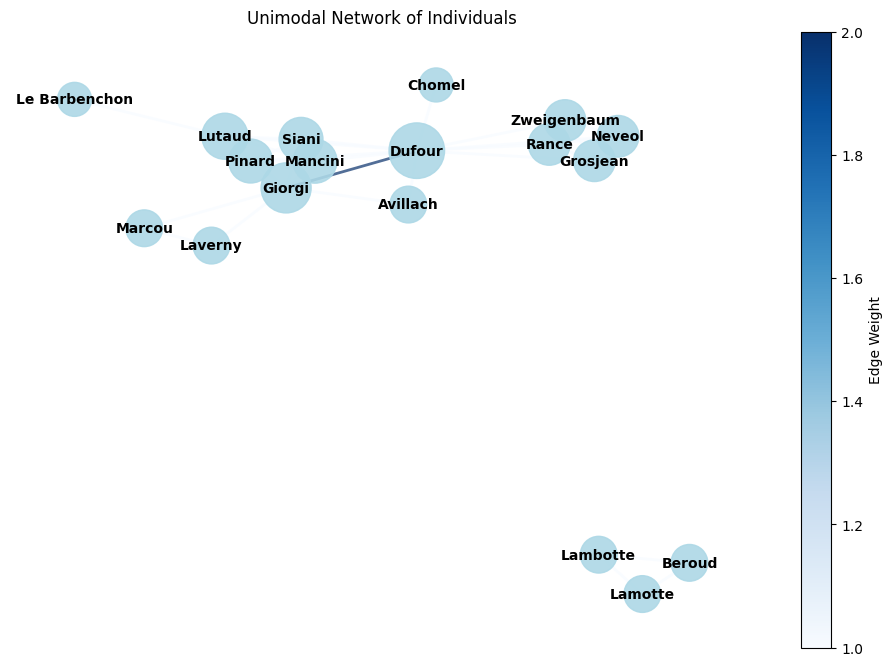

In [33]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Build the unimodal network with individuals
unimodal_network = nx.Graph()

# Add edges between individuals teaching in the same teaching unit
for course, professors in data.items():
    for prof1, prof2 in itertools.combinations(professors, 2):
        if unimodal_network.has_edge(prof1, prof2):
            # Increment weight if edge exists
            unimodal_network[prof1][prof2]['weight'] += 1
        else:
            # Add new edge with weight 1
            unimodal_network.add_edge(prof1, prof2, weight=1)

# Save the unimodal network
nx.write_graphml(unimodal_network, "unimodal_individuals.graphml")

# Visualize the unimodal network
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(unimodal_network, seed=42)  # Generate a layout for the graph

# Get edge weights for visualization
edge_weights = [unimodal_network[u][v]['weight'] for u, v in unimodal_network.edges]
node_sizes = [500 + (100 * len(unimodal_network.edges(node))) for node in unimodal_network.nodes]

# Normalize edge weights for visualization
max_weight = max(edge_weights) if edge_weights else 1
normalized_weights = [weight / max_weight for weight in edge_weights]

# Draw the graph
edges = nx.draw_networkx_edges(
    unimodal_network, pos, edge_color=normalized_weights, edge_cmap=plt.cm.Blues, width=2, alpha=0.7, ax=ax
)
nodes = nx.draw_networkx_nodes(
    unimodal_network, pos, node_size=node_sizes, node_color="lightblue", alpha=0.9, ax=ax
)
labels = nx.draw_networkx_labels(unimodal_network, pos, font_size=10, font_weight="bold", ax=ax)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=1, vmax=max_weight))
sm.set_array([])  # Required to initialize the ScalarMappable for the colorbar

# Add the colorbar to the plot
cbar = fig.colorbar(sm, ax=ax, label="Edge Weight")

# Finalize and show the plot
ax.set_title("Unimodal Network of Individuals")
plt.axis("off")
plt.show()





## Exercice 2 : Calculate different metrics

- Plot the degree distribution
- Compute the density
- Compute other centrality metrics : have a look to the documentation ; what is the node with the higher centrality ?
- Calculate the number of components of the graph
- Select only the principal component

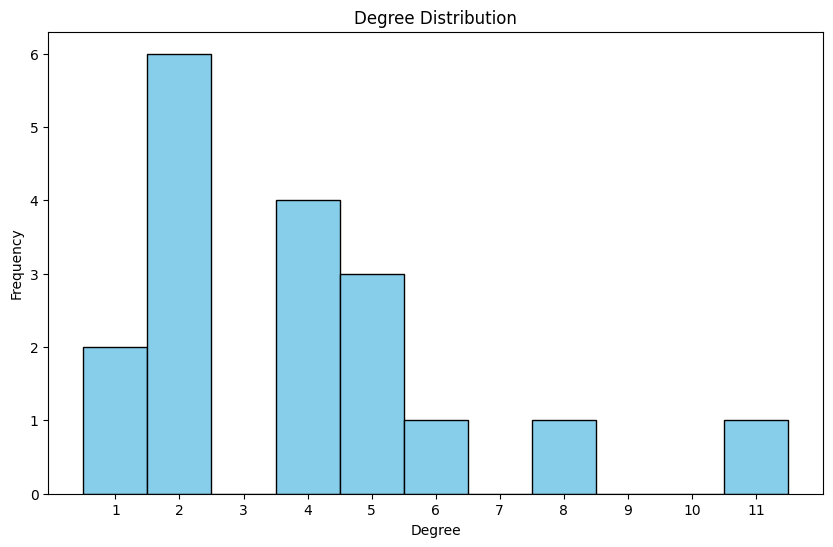

Density of the network: 0.2288

Nodes with the highest centrality for each metric:
Degree Centrality: Dufour (Value: 0.6471)
Closeness Centrality: Dufour (Value: 0.6782)
Betweenness Centrality: Dufour (Value: 0.3787)
Eigenvector Centrality: Dufour (Value: 0.4781)

Number of connected components: 2


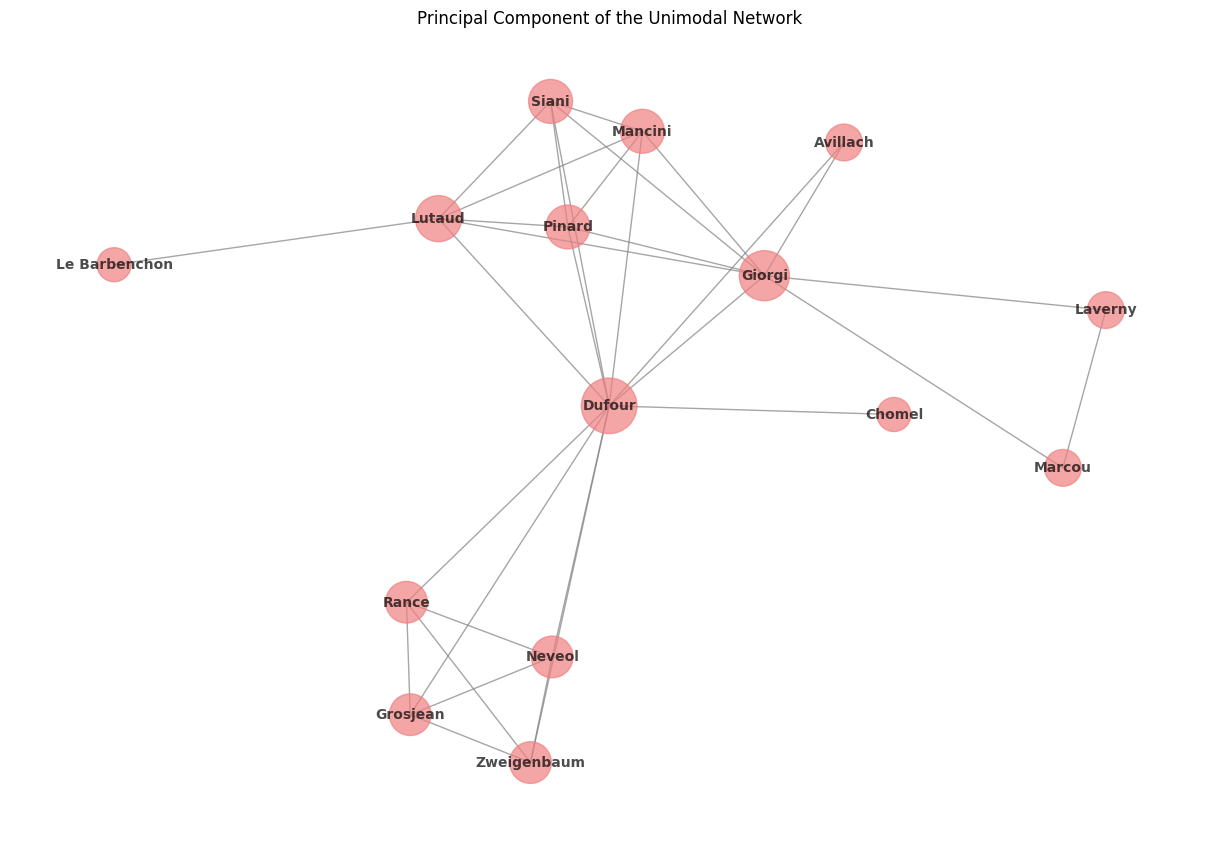

Number of nodes in the principal component: 15
Number of edges in the principal component: 32


In [34]:
# Plot degree distribution
degrees = [degree for _, degree in unimodal_network.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(1, max(degrees) + 2), align='left', color='skyblue', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xticks(range(1, max(degrees) + 1))
plt.show()

# Compute density of the graph
density = nx.density(unimodal_network)
print(f"Density of the network: {density:.4f}")

# Compute centrality metrics
centrality_measures = {
    "Degree Centrality": nx.degree_centrality(unimodal_network),
    "Closeness Centrality": nx.closeness_centrality(unimodal_network),
    "Betweenness Centrality": nx.betweenness_centrality(unimodal_network),
    "Eigenvector Centrality": nx.eigenvector_centrality(unimodal_network)
}

# Find node with the highest centrality for each metric
highest_centrality = {
    metric: max(values, key=values.get)
    for metric, values in centrality_measures.items()
}

# Print nodes with the highest centrality
print("\nNodes with the highest centrality for each metric:")
for metric, node in highest_centrality.items():
    print(f"{metric}: {node} (Value: {centrality_measures[metric][node]:.4f})")

# Calculate the number of connected components
num_components = nx.number_connected_components(unimodal_network)
print(f"\nNumber of connected components: {num_components}")

# Select the principal (largest) component
largest_component = max(nx.connected_components(unimodal_network), key=len)
principal_component = unimodal_network.subgraph(largest_component).copy()

# Visualize the principal component
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(principal_component, seed=42)
node_sizes = [500 + (100 * len(principal_component.edges(node))) for node in principal_component.nodes]

nx.draw(
    principal_component,
    pos,
    with_labels=True,
    font_weight='bold',
    node_size=node_sizes,
    node_color='lightcoral',
    font_color='black',
    font_size=10,
    edge_color='gray',
    linewidths=1,
    alpha=0.7
)

plt.title("Principal Component of the Unimodal Network")
plt.show()

# Display details of the principal component
print(f"Number of nodes in the principal component: {len(principal_component.nodes)}")
print(f"Number of edges in the principal component: {len(principal_component.edges)}")


## Exercise 3 : Clusterisation

 Clusterise the graph with the Louvain algorithm. Visualise the graph with colors based on the clustering.

<ipython-input-36-f326ccc9ce59>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab10", len(clusters))  # Use a colormap with enough unique colors


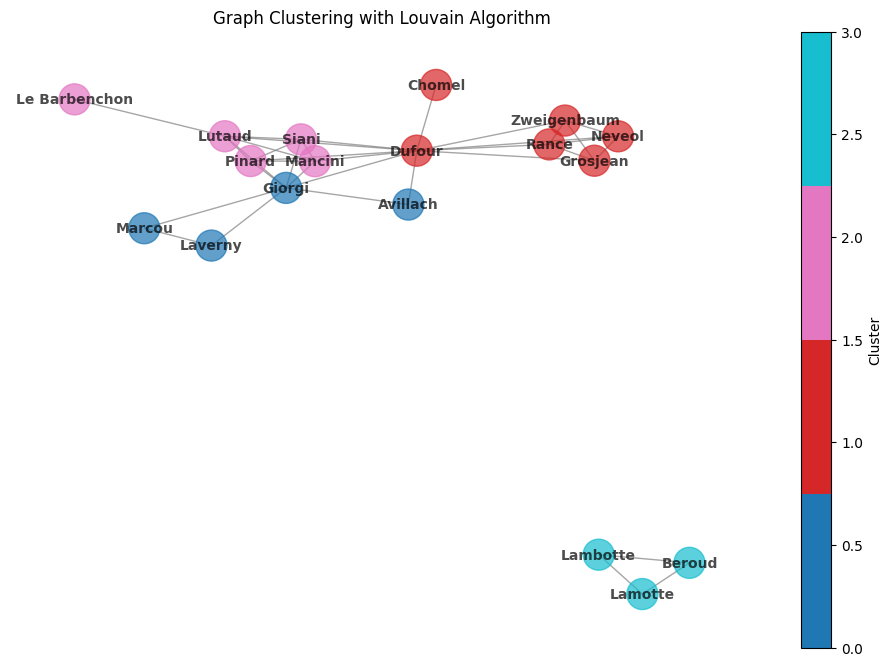

Cluster 0: ['Giorgi', 'Avillach', 'Marcou', 'Laverny']
Cluster 1: ['Dufour', 'Chomel', 'Grosjean', 'Neveol', 'Rance', 'Zweigenbaum']
Cluster 2: ['Pinard', 'Lutaud', 'Mancini', 'Siani', 'Le Barbenchon']
Cluster 3: ['Beroud', 'Lamotte', 'Lambotte']


In [36]:
from community import community_louvain  # Louvain algorithm for clustering
import matplotlib.cm as cm

# Perform clustering with the Louvain algorithm
partition = community_louvain.best_partition(unimodal_network)

# Assign cluster information to node attributes for visualization
nx.set_node_attributes(unimodal_network, partition, "cluster")

# Visualize the graph with nodes colored by their cluster
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(unimodal_network, seed=42)

# Assign colors based on clusters
clusters = set(partition.values())
color_map = cm.get_cmap("tab10", len(clusters))  # Use a colormap with enough unique colors
node_colors = [color_map(partition[node]) for node in unimodal_network.nodes]

# Draw the graph
nx.draw(
    unimodal_network,
    pos,
    with_labels=True,
    ax=ax,
    font_weight="bold",
    node_size=500,
    node_color=node_colors,
    font_color="black",
    font_size=10,
    edge_color="gray",
    linewidths=1,
    alpha=0.7
)

# Create a ScalarMappable for the colorbar
sm = cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=0, vmax=len(clusters) - 1))
sm.set_array([])  # Required to initialize the ScalarMappable for the colorbar

# Add the colorbar to the plot
fig.colorbar(sm, ax=ax, label="Cluster")

# Finalize and show the plot
ax.set_title("Graph Clustering with Louvain Algorithm")
plt.axis("off")
plt.show()

# Display cluster assignments
for cluster_id in clusters:
    nodes_in_cluster = [node for node, cluster in partition.items() if cluster == cluster_id]
    print(f"Cluster {cluster_id}: {nodes_in_cluster}")


## Exercise 4 : Export the graph in a csv file

Export the graph in a csv file as an edge list.

In [37]:
import pandas as pd

# Extract the edge list with weights from the graph
edges = nx.to_pandas_edgelist(unimodal_network)

# Save the edge list to a CSV file
edges.to_csv("unimodal_network_edgelist.csv", index=False)

# Display the exported file path
print("Edge list has been exported to 'unimodal_network_edgelist.csv'.")


Edge list has been exported to 'unimodal_network_edgelist.csv'.
